In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

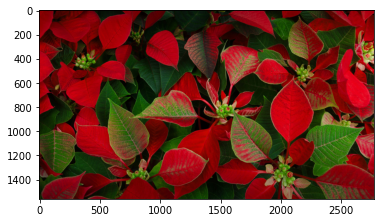

In [2]:
#Loading the image:
image = cv2.imread('/content/Poinsettia.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [3]:
#image1 = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)  #if test bluring via guassian
image1 = cv2.imread('/content/Poinsettia.jpg')
hsv = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)


In [4]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0   158k      0 --:--:-- --:--:-- --:--:--  158k


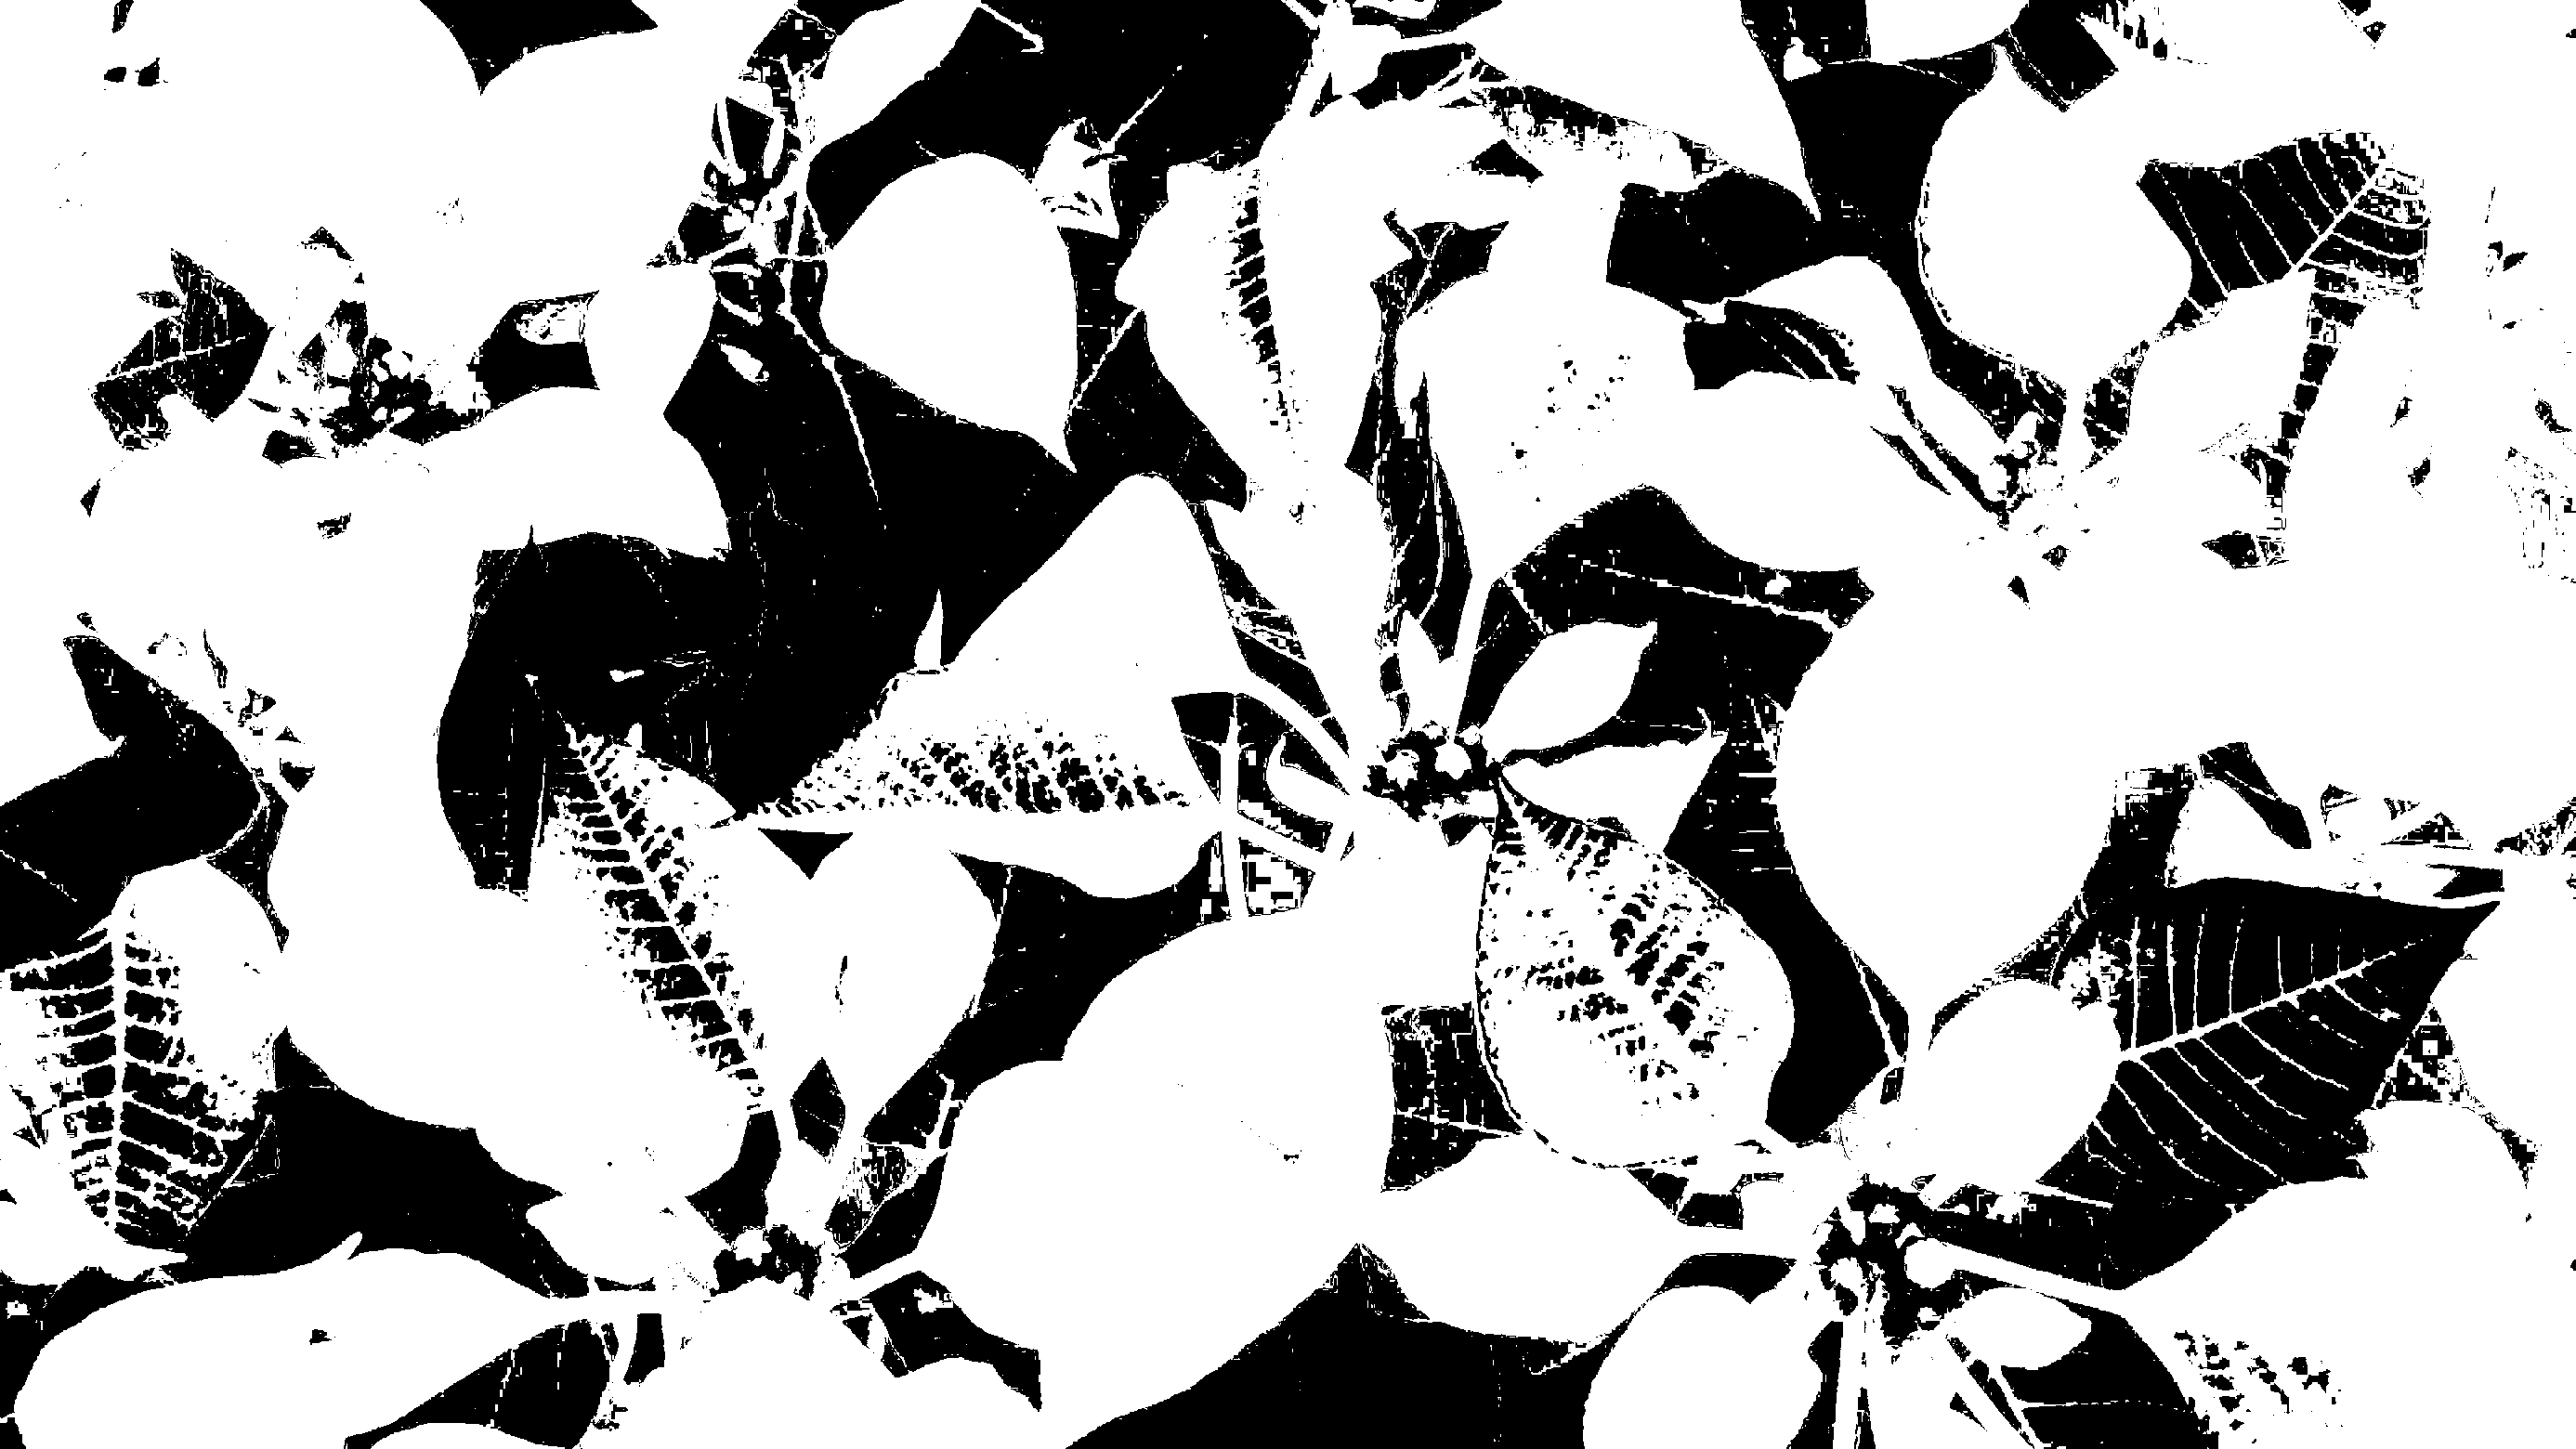

True

In [5]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
lower1 = (80,0,0)  
upper1 = (180,255,255)
mask1 = cv2.inRange(hsv, lower1, upper1)
lower2 = (0,20,20)
upper2 = (40,255,255)
mask2 = cv2.inRange(hsv, lower2, upper2)
mask0 = cv2.add(mask1,mask2)
mask = cv2.merge([mask0,mask0,mask0])
cv2_imshow(mask)
cv2.imwrite('mask.jpg', mask) 

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

hnew = np.mod(h + 60, 180).astype(np.uint8)

# recombine channels
hsv_new = cv2.merge([hnew,s,v])

# convert back to bgr
bgr_new = cv2.cvtColor(hsv_new, cv2.COLOR_HSV2BGR)


In [7]:
hi, w = image[:,:,0].shape
for i in range(hi):
  for j in range(w):
    if (mask0[i,j] == 0):
      bgr_new[i,j,0] = image[i,j,0]
      bgr_new[i,j,1] = image[i,j,1]
      bgr_new[i,j,2] = image[i,j,2]

In [8]:
rgb_new = cv2.cvtColor(bgr_new, cv2.COLOR_BGR2RGB) 

In [9]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
cv2_imshow(rgb_new)
cv2.imwrite('result-22.jpg', rgb_new) 

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.